# Generate testing datasets
Here the nodes are Genes and links are seen as Protein-Protein Interaction, where clusters mimic pathways. Each simulated patients presents mutations on a specific "pathway".

The dataset is saved as a pickle file at the end.

In [23]:
# Basic init & import
%pylab inline
import networkx as nx
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [24]:
# Pathways parameters
pathwaysNum=6;
genesNum=12;
connProbability=0.4;
connNeighboors=4;
connBetweenPathways=3;

In [25]:
# Pathways are initialized as independant Watts-Strogatz networks ...

def shiftNodeId(x):
    return x+genesNum*n

pathways=[]
for n in range(0,pathwaysNum):
    pathway=nx.connected_watts_strogatz_graph(genesNum,connNeighboors,connProbability)
    pathway=nx.relabel_nodes(pathway,shiftNodeId)
    pathways.append(pathway)
    
PPI=nx.union_all(pathways)

In [26]:
# ... which are connected together afterward.
def addBetweenPathwaysConnection(PPI,genesNum,pathwaysNum):
    # Select randomly two different pathways
    n1=np.random.randint(pathwaysNum)
    n2=n1
    while n2 == n1:
        n2=np.random.randint(pathwaysNum)
    # Connect them
    PPI.add_edge(np.random.randint(genesNum)+n1*genesNum,np.random.randint(genesNum)+n2*genesNum)
    return PPI

for BetweenPathwaysConnection in range(0,pathwaysNum*connBetweenPathways):
    PPI=addBetweenPathwaysConnection(PPI,genesNum,pathwaysNum)

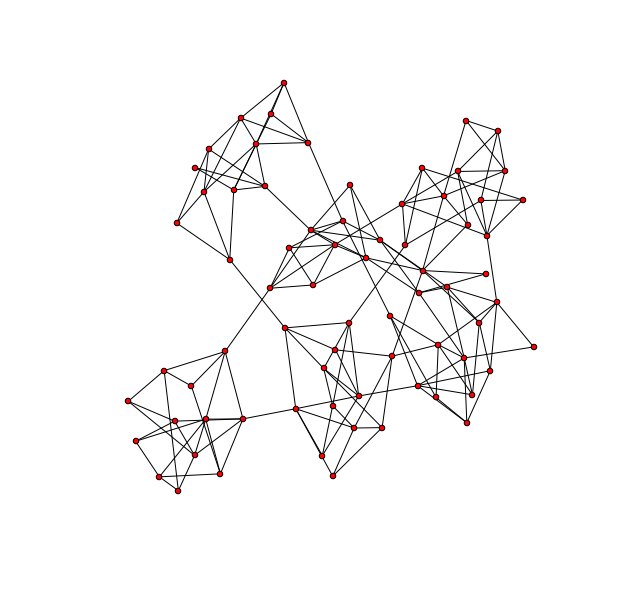

In [27]:
#import matplotlib.pyplot as plt
plt.figure(1,figsize=(8,8))
pos=nx.graphviz_layout(PPI,prog="neato")
nx.draw(PPI,pos,with_labels=False,node_size=30,cmap = plt.cm.Blues)
plt.show()

In [28]:
# Simulate patients with a specific mutation profile
patientsNum=60;
mutationProb=0.2;

def generateMutationProfile(genesNum,pathwaysNum):
    mutationProfile=np.zeros(pathwaysNum*genesNum)
    mutatedPathway=np.random.randint(pathwaysNum)
    pathwayMutations=(np.random.rand(genesNum)<=mutationProb)*1
    mutationProfile[(mutatedPathway*genesNum):(mutatedPathway*genesNum+genesNum)]=pathwayMutations
    return mutationProfile,mutatedPathway

def assignMutation(PPI,mutationProfile):
	for n in range(0,len(PPI)):
		PPI.node[n]['val']=mutationProfile[n]
	return PPI

patients=[]
phenotypes=[]
for patient in range(0,patientsNum):
    mutationProfile,mutatedPathway=generateMutationProfile(genesNum,pathwaysNum)
    patients.append(assignMutation(PPI,mutationProfile).copy())
    phenotypes.append(mutatedPathway)

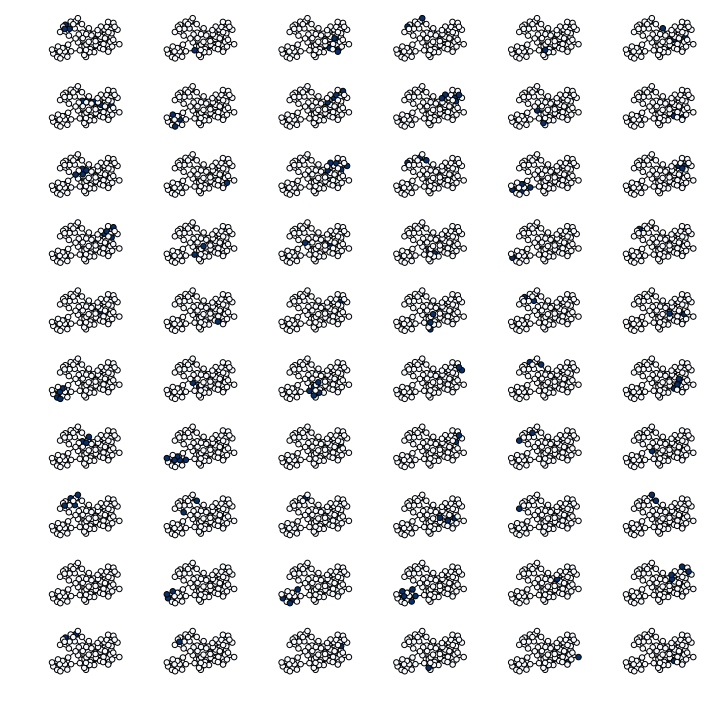

In [29]:
# Visualization of the patients networks with mutations
def extractMutationProfile(PPI):
    return [float(PPI.node[gene]['val']) for gene in PPI.nodes()]

import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,12))
pos=nx.graphviz_layout(PPI,prog="neato")
for pn in range(0,patientsNum):
    node_color=extractMutationProfile(patients[pn])
    plt.subplot(10, 6, pn+1)
    nx.draw(patients[pn],pos,with_labels=False,node_size=30,node_color=node_color,cmap = plt.cm.Blues)
plt.show()

In [30]:
# Store new dataset?
newDataset=False

import pickle
if newDataset:
    file = open('dataset.txt', 'w')
    data = {'PPI': PPI, 'patients' : patients, 'phenotypes': phenotypes, 'pathwaysNum': pathwaysNum,'genesNum': genesNum,'connProbability': connProbability,'connNeighboors': connNeighboors,'connBetweenPathways': connBetweenPathways,'patientsNum': patientsNum,'mutationProb': mutationProb}
    pathwaysNum,genesNum,connProbability,connNeighboors,connBetweenPathways,patientsNum,mutationProb
    pickle.dump(data, file)
file.close()